In [203]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [181]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [204]:
batch_size = 32
num_classes = 10
epochs = 30

In [205]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [206]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Model 1

Model 1 is a very simple convolutional neural network

In [185]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))

model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

In [186]:
model1.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [187]:
history1 = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 7s 183us/step - loss: 2.0324 - acc: 0.2625 - val_loss: 1.7971 - val_acc: 0.3733
Epoch 2/30
40000/40000 [==============================] - 6s 153us/step - loss: 1.6949 - acc: 0.3938 - val_loss: 1.5630 - val_acc: 0.4431
Epoch 3/30
40000/40000 [==============================] - 7s 167us/step - loss: 1.5082 - acc: 0.4578 - val_loss: 1.4632 - val_acc: 0.4732
Epoch 4/30
40000/40000 [==============================] - 7s 169us/step - loss: 1.4036 - acc: 0.4986 - val_loss: 1.3917 - val_acc: 0.5023
Epoch 5/30
40000/40000 [==============================] - 7s 173us/step - loss: 1.3252 - acc: 0.5258 - val_loss: 1.3327 - val_acc: 0.5236
Epoch 6/30
40000/40000 [==============================] - 6s 155us/step - loss: 1.2561 - acc: 0.5557 - val_loss: 1.2577 - val_acc: 0.5594
Epoch 7/30
40000/40000 [==============================] - 6s 146us/step - loss: 1.1962 - acc: 0.5755 - val_loss: 1.2378 - 

In [200]:
result1 = model1.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
test_acc_1 = result1[1]
print('The accuracy of model 1 for test data is: {}%'.format(test_acc_1*100))

10000/10000 [==============================] - 1s 74us/step
The accuracy of model 1 for test data is: 67.92%


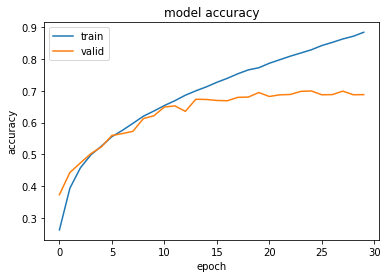

In [201]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

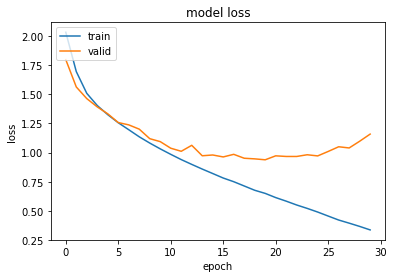

In [202]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Model 2

In [218]:
#add more layer and add droupout

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))

model2.add(Conv2D(32, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))

model2.add(Conv2D(32, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))

model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

In [219]:
model2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [220]:
history2 = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          validation_split=0.2,
          shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 10s 243us/step - loss: 2.3006 - acc: 0.1121 - val_loss: 2.2930 - val_acc: 0.1942
Epoch 2/100
40000/40000 [==============================] - 9s 216us/step - loss: 2.1990 - acc: 0.1774 - val_loss: 2.0539 - val_acc: 0.2381
Epoch 3/100
40000/40000 [==============================] - 9s 225us/step - loss: 2.0390 - acc: 0.2366 - val_loss: 1.9523 - val_acc: 0.2786
Epoch 4/100
40000/40000 [==============================] - 8s 196us/step - loss: 1.9196 - acc: 0.2803 - val_loss: 1.8000 - val_acc: 0.3250
Epoch 5/100
40000/40000 [==============================] - 8s 195us/step - loss: 1.8143 - acc: 0.3175 - val_loss: 1.7109 - val_acc: 0.3636
Epoch 6/100
40000/40000 [==============================] - 8s 206us/step - loss: 1.7370 - acc: 0.3506 - val_loss: 1.7834 - val_acc: 0.3456
Epoch 7/100
40000/40000 [==============================] - 7s 187us/step - loss: 1.6551 - acc: 0.3824 - val_loss: 1

40000/40000 [==============================] - 9s 215us/step - loss: 0.7910 - acc: 0.7215 - val_loss: 0.7505 - val_acc: 0.7423
Epoch 60/100
40000/40000 [==============================] - 9s 215us/step - loss: 0.7828 - acc: 0.7278 - val_loss: 1.0695 - val_acc: 0.6434
Epoch 61/100
40000/40000 [==============================] - 9s 215us/step - loss: 0.7854 - acc: 0.7260 - val_loss: 0.7537 - val_acc: 0.7374
Epoch 62/100
40000/40000 [==============================] - 8s 212us/step - loss: 0.7807 - acc: 0.7282 - val_loss: 0.7347 - val_acc: 0.7493
Epoch 63/100
40000/40000 [==============================] - 8s 212us/step - loss: 0.7714 - acc: 0.7290 - val_loss: 0.7376 - val_acc: 0.7439
Epoch 64/100
40000/40000 [==============================] - 8s 210us/step - loss: 0.7687 - acc: 0.7299 - val_loss: 0.7264 - val_acc: 0.7497
Epoch 65/100
40000/40000 [==============================] - 9s 214us/step - loss: 0.7685 - acc: 0.7300 - val_loss: 0.7292 - val_acc: 0.7445
Epoch 66/100
40000/40000 [=======

In [221]:
result2 = model2.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
test_acc_2 = result2[1]
print('The accuracy of model 2 for test data is: {}%'.format(test_acc_2*100))

10000/10000 [==============================] - 1s 87us/step
The accuracy of model 2 for test data is: 76.41%


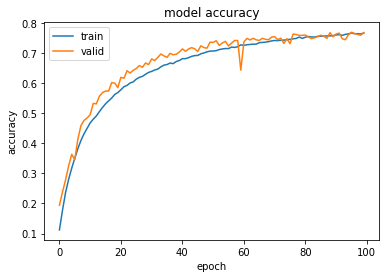

In [222]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

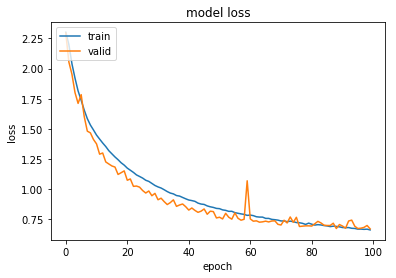

In [223]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

Although the accuracy of training dataset has been improved, the accuracy of test dataset has no significant change. A simple deeper neural network isn't enough.

In [88]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [89]:
# add augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(x_train)

In [90]:
x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")

In [91]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [84]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [93]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] / batch_size,
                    epochs=30,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/30
1563/1562 [==============================] - 17s 11ms/step - loss: 14.4635 - acc: 0.1026 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/30
1563/1562 [==============================] - 17s 11ms/step - loss: 14.5065 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/30
1489/1562 [===========================>..] - ETA: 0s - loss: 14.4998 - acc: 0.1004

KeyboardInterrupt: 

In [97]:
# build again, same model as model1

#reg=l2(1e-4)   # L2 or "ridge" regularisation
reg2=None
num_filters2=32
ac2='relu'
adm2=keras.optimizers.Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt2=adm2
drop_dense2=0.5
drop_conv2=0

model2 = Sequential()

model2.add(Conv2D(num_filters2, (3, 3), activation=ac2, kernel_regularizer=reg2, input_shape=(img_rows, img_cols, channels),padding='same'))
#model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
#model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model2.add(Dropout(drop_conv2))

model2.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
#model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
#model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model2.add(Dropout(drop_conv2))

model2.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
#model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
#model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model2.add(Dropout(drop_conv2))

model2.add(Flatten())
model2.add(Dense(512, activation=ac2,kernel_regularizer=reg2))
#model2.add(BatchNormalization())
model2.add(Dropout(drop_dense2))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt2)

In [100]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 64)          0         
__________